# Aprendizado de Máquina - Trabalho 02 - parte II

Neste exercício, será implementado o algoritmo de detecção de anomalia a ser aplicado para detectar servidores com falha em uma rede. Na segunda parte, será usada a filtragem colaborativa para criar um sistema de recomendação para filmes.

## Detecção de Anomalias

Será implementado um algoritmo de detecção de anomalia para detectar comportamentos anômalos nos servidores de um centro de dados. As características medem a vazão (mb/s) e a latência (ms) de resposta de cada servidor. Enquanto seus servidores estavam funcionando, foram coletados m = 307 exemplos de como eles estavam se comportando. Há a suspeita de que a grande maioria desses exemplos são exemplos ”normais”(não anômalos) dos servidores que operam normalmente, mas também pode haver alguns exemplos de servidores que atuam de forma anômala nesse conjunto de dados. Usar um modelo gaussiano para detectar exemplos anômalos em seu conjunto de dados. 
Será usado um conjunto de dados 2D que permitirá a visualização do que o algoritmo está fazendo. Nesse conjunto de dados, será ajustada uma distribuição gaussiana e então encontrados valores que têm probabilidade muito baixa e, portanto, podem ser considerados anomalias.

### Distribuição Gaussiana

Para realizar a detecção de anomalia, é preciso primeiro ajustar um modelo à distribuição dos dados.

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib as mpl
import matplotlib.pyplot as plt  
import seaborn as sb  
from scipy.io import loadmat  
%matplotlib inline

A tarefa á implementar código em um arquivo de nome estimativaGaussian.py, que deve conter uma função de mesmo nome. Esta função toma como entrada a matriz de dados X e deve produzir um vetor de dimensão n mu que contém a média de todas as características n e outro vetor de dimensão n sigma2 que contém as vari^ancias de todas as características.

In [3]:
dados = loadmat('C:\\Users\\Flavio\\Downloads\\AprendizadoMaquina\\T2\\ex8data1.mat')  
X = dados['X']  

In [4]:
%run -i "C:\\Users\\Flavio\\Downloads\\AprendizadoMaquina\\T2\\estimativaGaussian.py"

mu, sigma = estimativaGaussian(X)  
print("Médias dos dados: ", mu)
print("Variâncias dos dados: ", sigma)

Médias dos dados:  [ 14.11222578  14.99771051]
Variâncias dos dados:  [ 1.83263141  1.70974533]


"\nfig, ax = plt.subplots(figsize=(12,8))\nplt.axes.set_xlabel('' )\nplt.axes.set_ylabel('throughput (mb/s)' )\nax.scatter(X[:,0], X[:,1], marker='x',)\n"

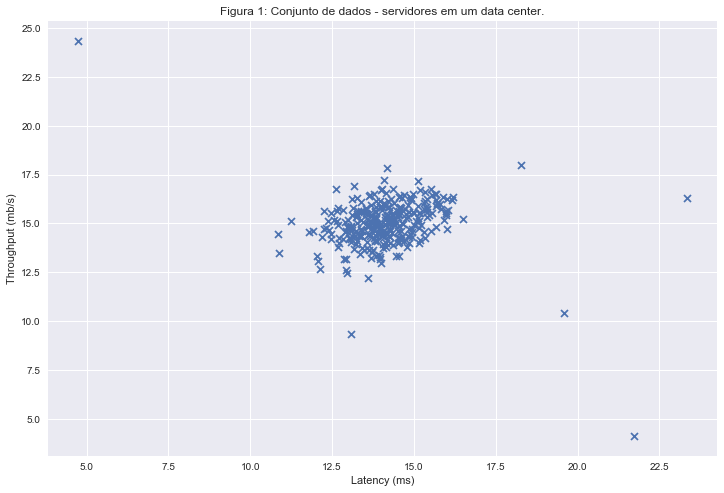

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
plt.title('Figura 1: Conjunto de dados - servidores em um data center.')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
ax.scatter(X[:,0], X[:,1], marker='x',)

"""
fig, ax = plt.subplots(figsize=(12,8))
plt.axes.set_xlabel('' )
plt.axes.set_ylabel('throughput (mb/s)' )
ax.scatter(X[:,0], X[:,1], marker='x',)
"""

Se pode ver que a maioria dos exemplos está na região com maior probabilidade, enquanto
os exemplos anômalos estão nas regiões com probabilidades menores.

### Selecionando ϵ

Agora com os parâmetros gaussianos avaliados, se pode investigar quais exemplos têm uma probabilidade muito alta dada essa distribuição e quais exemplos têm uma probabilidade muito baixa. Os exemplos de baixa probabilidade são mais prováveis de ser as anomalias em nosso conjunto de dados. Uma maneira de determinar quais exemplos são anomalias é selecionar um limite ϵ com base em um conjunto de validação cruzada. Nesta parte do exercício, será implementado um algoritmo para selecionar o limite ϵ usando a medida F1 em um conjunto de validação cruzada.

Para cada exemplo no conjunto de validação, deve ser computado Pr(x(i)cv). O vetor de todas essas probabilidades, assim como os rótulos correspondentes, devem ser passados a função implementada em selectThreshold.py.

In [6]:
Xval = dados['Xval']  
yval = dados['yval']

from scipy import stats
distribuicao = stats.norm(mu[0], sigma[0])
distribuicao.pdf(X[:,0])[0:50] #função de densidade de probabilidade em todos os pontos

array([ 0.183842  ,  0.20221694,  0.21746136,  0.19778763,  0.20858956,
        0.21652359,  0.16991291,  0.15123542,  0.1163989 ,  0.1594734 ,
        0.21716057,  0.21760472,  0.20141857,  0.20157497,  0.21711385,
        0.21758775,  0.21695576,  0.2138258 ,  0.21057069,  0.1173018 ,
        0.20765108,  0.21717452,  0.19510663,  0.21702152,  0.17429399,
        0.15413455,  0.21000109,  0.20223586,  0.21031898,  0.21313426,
        0.16158946,  0.2170794 ,  0.17825767,  0.17414633,  0.1264951 ,
        0.19723662,  0.14538809,  0.21766361,  0.21191386,  0.21729442,
        0.21238912,  0.18799417,  0.21259798,  0.21752767,  0.20616968,
        0.21520366,  0.1280081 ,  0.21768113,  0.21539967,  0.16913173])

Cálculo da densidade de probabilidade de cada um dos valores no conjunto de dados

In [7]:
p = np.zeros((X.shape[0], X.shape[1]))  
p[:,0] = stats.norm(mu[0], sigma[0]).pdf(X[:,0])  
p[:,1] = stats.norm(mu[1], sigma[1]).pdf(X[:,1])

Idem para o conjunto de validação:

In [8]:

pval = np.zeros((Xval.shape[0], Xval.shape[1]))  
pval[:,0] = stats.norm(mu[0], sigma[0]).pdf(Xval[:,0])  
pval[:,1] = stats.norm(mu[1], sigma[1]).pdf(Xval[:,1])  

A função selectThreshold.py retornará dois valores; o primeiro é o limite
selecionado ϵ. A função também retornará a pontuação F1.

In [9]:
%run -i "C:\\Users\\Flavio\\Downloads\\AprendizadoMaquina\\T2\\selectThreshold.py"

e, f1 = selectThreshold(pval, yval)  
print("Melhor valor de Epsilon: %.4f" %e)
print("Melhor valor de F1: %.4f" %f1)

Melhor valor de Epsilon: 0.0096
Melhor valor de F1: 0.7143


C:\\Users\\Flavio\\Downloads\\AprendizadoMaquina\\T2\\selectThreshold.py:15: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp / (tp + fp)


Nota sobre o aviso retornoado: Às vezes, NaNs ou valores nulos nos dados gerarão esse erro com Numpy. O problema pode ser originado com a entrada de dados de um arquivo CSV ou algo assim.

Caso haja tempo de corrigir antes do prazo encerrar, implementar as sugestões:
-> Use pd.set_option to set number of decimal to consider in your analysis so an infinitesmall number does not trigger similar problem - ('display.float_format', lambda x: '%.3f' % x).
-> Use df.round() to round the numbers so Panda drops the remaining digits from analysis. 
-> Set NaN to zero df=df.fillna(0). (careful, Filling NaN with zero does not apply to your data sets because this will treat the record as zero so N in the mean, std etc also changes)

### Visualização dos resultados: outliers

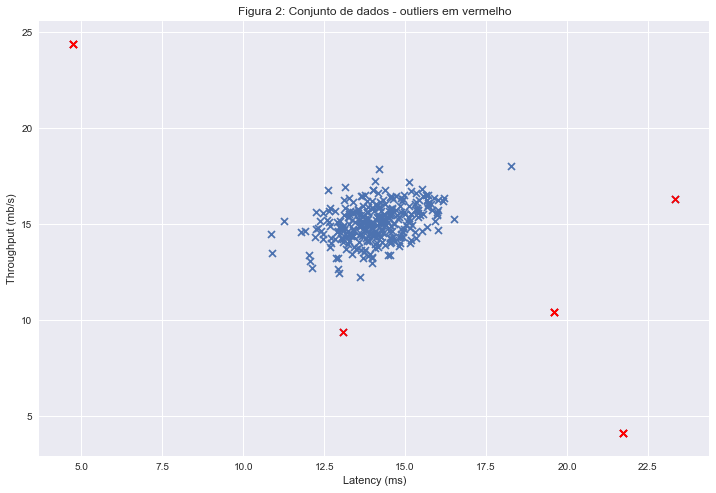

In [10]:
outliers = np.where(p < e)
fig, ax = plt.subplots(figsize=(12,8))
plt.title('Figura 2: Conjunto de dados - outliers em vermelho')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
ax.scatter(X[:,0], X[:,1], marker='x')  
ax.scatter(X[outliers[0],0], X[outliers[0],1], s=50, color='r', marker='x')

## Sistemas de Recomendação

Nesta parte, será implementado o algoritmo de aprendizagem de filtragem colaborativa e este será aplicado a um conjunto de dados de avaliações de filmes. Este conjunto de dados consiste em classificações em uma escala de 1 a 5. O conjunto de dados tem 943 usuários (nu) e 1682 filmes (nm). 

In [11]:
dados2 = loadmat('C:\\Users\\Flavio\\Downloads\\AprendizadoMaquina\\T2\\ex8_movies.mat')  

### Conjunto de dados de classificações de filme

O objetivo da filtragem colaborativa é prever as classificações de filmes para os filmes que os usuários ainda não classificaram. Isso permitirá recomendar os filmes com classificações mais altas previstas para outros usuários.

Podemos observar a classificação média dos filmes com uma média de uma linha em Y para índices onde uma classificação está presente.

In [12]:
Y = dados2['Y']  
R = dados2['R'] 
print("Classificação média dos filmes: %.4f" %Y[1,R[1,:]].mean()  )

Classificação média dos filmes: 2.5832


### Algoritmo de aprendizagem de filtragem colaborativa

Foi implementado o algoritmo colaborativo de aprendizagem de filtragem em um arquivo de nome cofiCostFunc.py
para calcular a função de custo e o gradiente para filtragem colaborativa.

In [13]:
%run -i "C:\\Users\\Flavio\\Downloads\\AprendizadoMaquina\\T2\\cofiCostFunc.py"


In [15]:
users = 4  
movies = 5  
features = 3

parametros = loadmat('C:\\Users\\Flavio\\Downloads\\AprendizadoMaquina\\T2\\ex8_movieParams.mat')  

X = parametros['X']
Theta = parametros['Theta']
X.shape, Theta.shape
X_sub = X[:movies, :features]  
Theta_sub = Theta[:users, :features]  
Y_sub = Y[:movies, :users]  
R_sub = R[:movies, :users]

params = np.concatenate((np.ravel(X_sub), np.ravel(Theta_sub)))


J, grad = cofiCostFunc(params, Y_sub, R_sub, features)
print("Custo: %.2f" %J)
print("Gradiente:")
print(grad)

Custo: 22.22
Gradiente:
[ -2.52899165   7.57570308  -1.89979026  -0.56819597   3.35265031
  -0.52339845  -0.83240713   4.91163297  -0.76677878  -0.38358278
   2.26333698  -0.35334048  -0.80378006   4.74271842  -0.74040871
 -10.5680202    4.62776019  -7.16004443  -3.05099006   1.16441367
  -3.47410789   0.           0.           0.           0.           0.           0.        ]


Depois de implementar a função, ela foi testada e a saída foi de 22,22.

A função retornou o gradiente para ambos os conjuntos de variáveis, armazenando-os em um único vetor.